In [601]:
import pandas as pd
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt 
import seaborn as sb

In [602]:
sharks = pd.read_csv("../data/cleaned_attacks.csv")
sharks.sample(3)

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source
6223,ND.0090,"No date, Before Aug-1989",unknown,Unprovoked,VANUATU,Malampa Province,Malakula,other,female,F,unknown,FATAL,Y,NaN,NaN,S. Combs
2960,1982.10.13,13-Oct-1982,1982,Unprovoked,USA,Florida,North Dade- Interama area of Biscayne Bay,surfing,Rob Savanello,M,26,Left foot lacerated,N,11h00,1.5 m [5'] shark,"P. Hamm, Miami Herald, 10/15/1982"
570,2014.03.29,29-Mar-2014,2014,Invalid,AUSTRALIA,Western Australia,Off Dawesville Cut,diving,Michael McGregor,M,38,Shark bites may have been post mortem,unknown,13h30,Shark involvement prior to death not confirmed,"The West Australian, 4/2/2014"


**VISUALIZATION**

    ''' Now that we've imported the clean dataset we can start and solve the hipotesis with graphics.'''

    1. Are sharks getting tired of attacking, or are humans getting more annoying?

In [603]:
year_filtered = (sharks[sharks["year"] != "unknown"])
year_filtered['Year'] = pd.to_numeric(year_filtered["year"], errors='coerce').fillna(0)
year_filtered['Year'] = year_filtered['Year'].astype(int)
attacks_count = year_filtered["Year"].value_counts().reset_index()
attacks_count.columns = ["Year", "attacks_count"]

''' I wanted to create a subset with only the years without the "unknown" and make sure they were int. 
I also wanted a scatter plot but as they work with two quantitative variables, I added the counts as the index, and  made it the y axis.'''

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/3269550098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_filtered['Year'] = pd.to_numeric(year_filtered["year"], errors='coerce').fillna(0)
/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/3269550098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_filtered['Year'] = year_filtered['Year'].astype(int)


' I wanted to create a subset with only the years without the "unknown" and make sure they were int. \nI also wanted a scatter plot but as they work with two quantitative variables, I added the counts as the index, and  made it the y axis.'

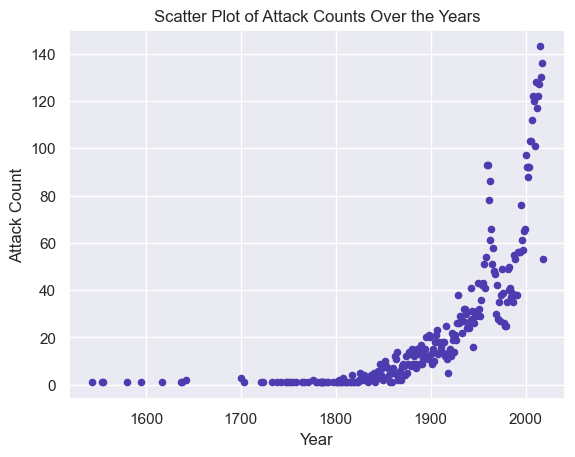

In [604]:
plt.scatter(attacks_count['Year'], attacks_count['attacks_count'], s=20, c='#4D3CAF', label='Attack Counts');
plt.xlabel('Year')
plt.ylabel('Attack Count')
plt.title('Scatter Plot of Attack Counts Over the Years')

plt.savefig(f"../images/scatter_attacks_years.jpg", dpi=300)

''' As we can see in this plot, the shark attacks have increased in the last century. We can atribute that to different hypothesis. 
1. is that we have more resources to navigate
2. change of weather , although we don't have the data to demonstrate that
3. change on the human life conditions
4. maybe also change in the sense of peril

Let's see the data in another graphic so that we can analize it deeper.'''

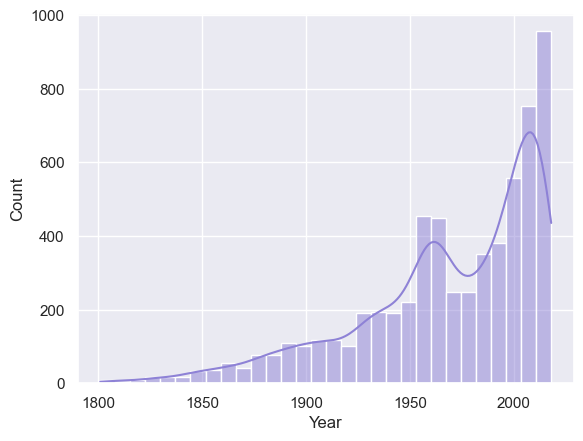

In [605]:
year_= (year_filtered[year_filtered["Year"] > 1800])
sb.histplot(x=year_.Year, bins = 30, color = "#8E82D6", kde=True);
plt.savefig(f"../images/hist_attacks_years", dpi=300)

''' To be able to give response on which of our 4 hypothesis is true, we need to analize deeper.

Let's understand why the sharks are not only not getting, tired, but getting fiercer.'''

    2. If they're not getting tired, why is that? 

'''Shall we take a look at the activities people were doing when the attackes occurred?

The answer is obviously, YES, WE SHALL!! '''

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/3071783717.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = sharks["activity"], order = sharks["activity"].value_counts().index, palette="twilight");


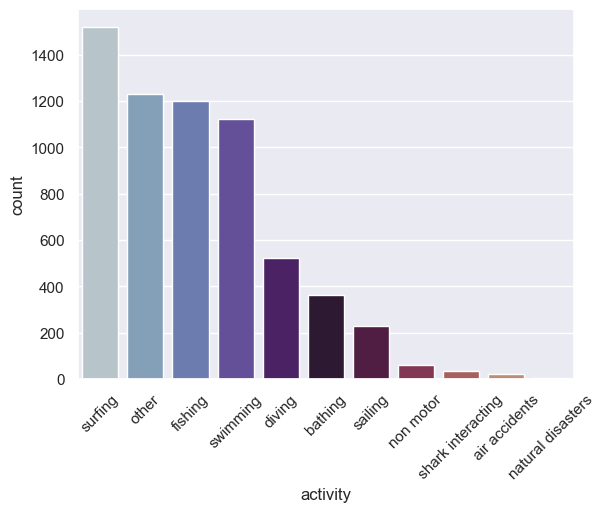

<Figure size 640x480 with 0 Axes>

In [606]:
sb.countplot(x = sharks["activity"], order = sharks["activity"].value_counts().index, palette="twilight");
sb.set(font_scale=1.0)
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"../images/activities.png", dpi=300)

''' From the data we get from the graphic, we can assume that the great mass of the attacks come from lifestyle. 

Let's get more specific and see only data on the activities from the last 50 years.

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/358525040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = recent_activity["activity"], order = recent_activity["activity"].value_counts().index, palette="crest");


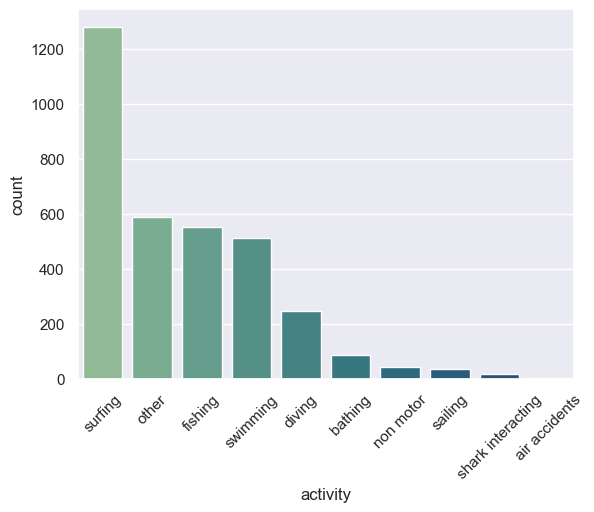

<Figure size 640x480 with 0 Axes>

In [607]:
recent_activity = year_filtered[year_filtered["Year"] > 1970]
sb.countplot(x = recent_activity["activity"], order = recent_activity["activity"].value_counts().index, palette="crest");
sb.set(font_scale=1.0)
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"../images/activities_years.png", dpi=300)

'''In perspective, we can see a decrease on the maybe considered more "survival" colum, fishing. And an increase of the "surf" column. But what also caught my attention is the shark interacting accidents as neither decreases or increases, so I want to check if that is because they are mostly concentrated recently or they're equally divided throughout the years. '''

In [608]:
interacting = year_filtered[year_filtered["activity"] == "shark interacting"]

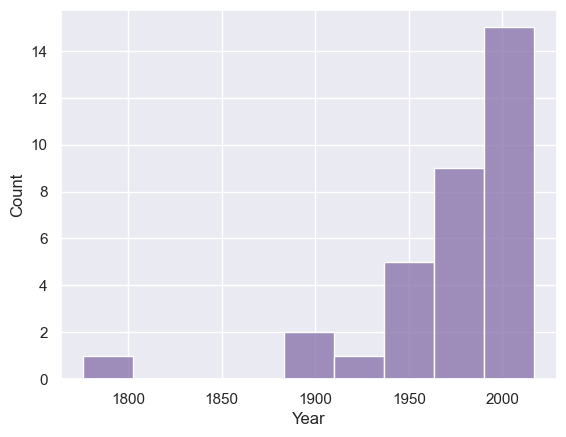

In [609]:
sb.histplot(data=interacting, x= "Year", color= "#856EA8")
plt.savefig(f"../images/shark_int_years.jpg", dpi=300)

'''We can see that most of the shark interacting attacks are on increase in recent years. So maybe the hypothesis that the sense of peril has changed might also be true. Also meaning that humans are getting more annoying. 

But is it all humans or just a fraction?'''

    3.Are men more attaked than women or the contrary? 
       "Let's prove the obvious answer, that we're not going to say."

''' First let's check how the attacks over the years get distributed against the gender of the victims. Is it always more or less the same pattern or is it diverse?'''

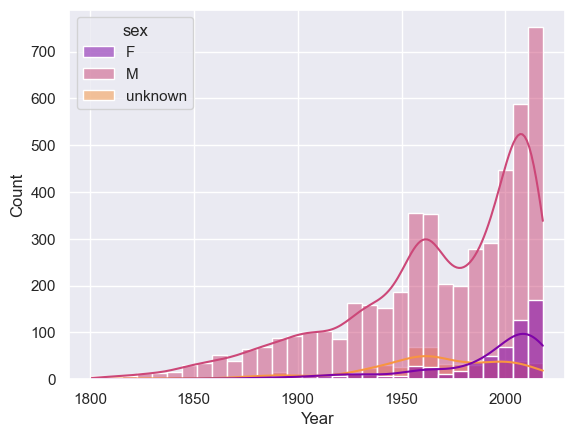

In [610]:
#sns.boxplot(data=titanic, x="Pclass", y="Age");
sb.histplot(x=year_.Year, hue = year_.sex, bins = 30, palette="plasma", kde=True);
plt.savefig(f"../images/years_sex.jpg", dpi=300)

''' As we can see from the plot, men have always been the wonners of getting attacked by sharks.

Now let's also check if we can extract more information from the age and the gender. 

Is it just a fase, or are they like that?'''

In [611]:
age_filtered = sharks[sharks["age"] != "unknown"]
age_filtered['age'] = age_filtered['age'].astype(int)

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/3781289354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered['age'] = age_filtered['age'].astype(int)


/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/2688634054.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=age_filtered, x="age", y="sex", palette="crest")


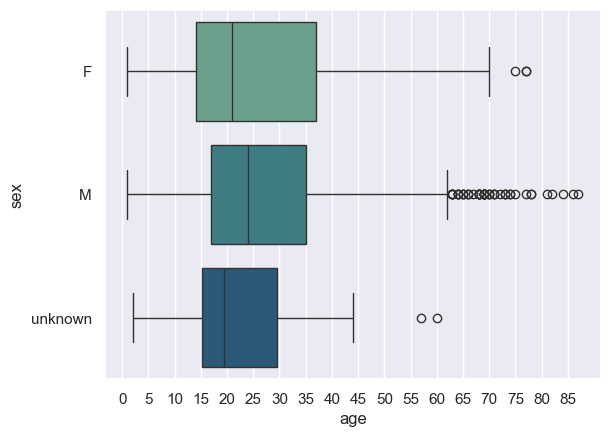

<Figure size 640x480 with 0 Axes>

In [612]:
sb.boxplot(data=age_filtered, x="age", y="sex", palette="crest")
plt.xticks(range(0, age_filtered['age'].max() + 1, 5))
plt.show()
plt.savefig(f"../images/sex_age.png", dpi=300)

'''We can see from this box plot that between men and women, women number of attacks tend to be more stable along the age, the min and the max are more distant and the 50% of the data is also wider, meaning the data is more stable. Whilst men tend to be attacked by sharks on a more concentrated range of age.

Maybe that has something to do with the activities that men and women are doing when the attacked happens.'''

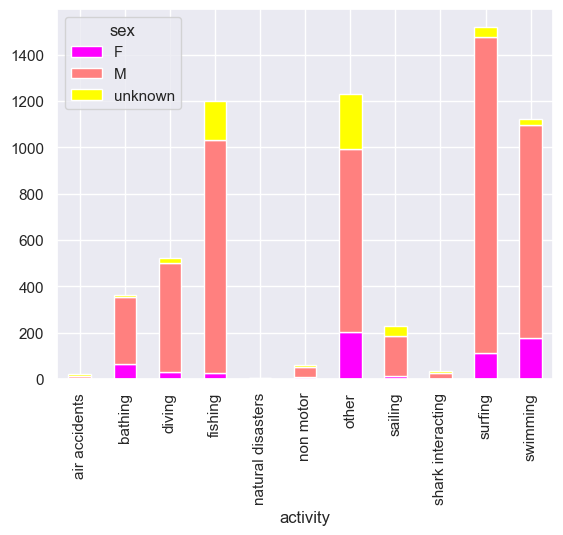

<Figure size 640x480 with 0 Axes>

In [613]:

a_s = sharks.groupby(["activity","sex"]).size().unstack()

a_s.plot(kind='bar', stacked=True, colormap="spring")
plt.show()

plt.savefig(f"../images/sex_activities.png", dpi=300)


''' The men normally do more adrenaline activities, so maybe they also have the peril sense lower and provoke more atacks? Let's see how many of the attacks where provoked between man and women.'''

In [614]:
filter_type = sharks[sharks["type"] == "Provoked"]
filter_type.sample(3)

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source
3997,1960.04.20.R,Reported 20-Apr-1960,1960,Provoked,SOUTH AFRICA,Eastern Cape Province,Port Alfred,fishing,P. Wagener,M,unknown,Gaffed shark bit his ankle PROVOKED INCIDENT,N,NaN,"Raggedtooth shark, 100-lb","Eastern Province Herald, 4/20/1960"
5533,1902.07.15,15-Jul-1902,1902,Provoked,ITALY,Liguria,"Galliera dock, Genoa",fishing,male,M,unknown,Face & arms injured by hooked shark PROVOKED I...,N,NaN,NaN,"C. Moore, GSAF"
5242,1921.09.00,Sep-1921,1921,Provoked,ENGLAND,Dorset,Weymouth,fishing,Roberts,M,unknown,Leg bitten by shark he was attempting to captu...,N,NaN,"Blue shark, 4'","Argus, 10/8/1921"


/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/1165767035.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(filter_type["sex"], palette="twilight")


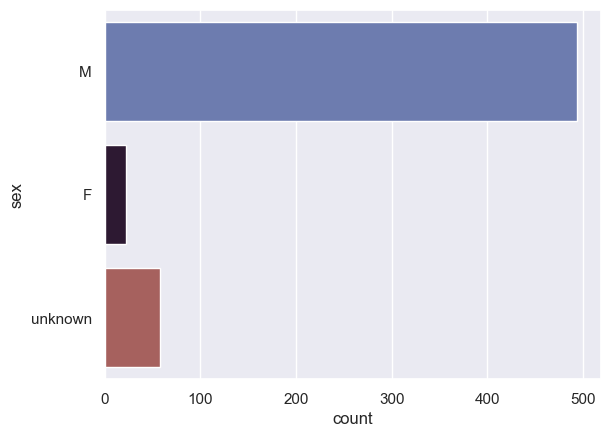

In [615]:

sb.countplot(filter_type["sex"], palette="twilight")
plt.savefig(f"../images/provoked_sex.jpg", dpi=300)
plt.show()

'''We see that most of the provoked attacks are by men. Let's also check shark interacting, because os sense of peril, to compare men and women participation, to end our hypothesis.'''

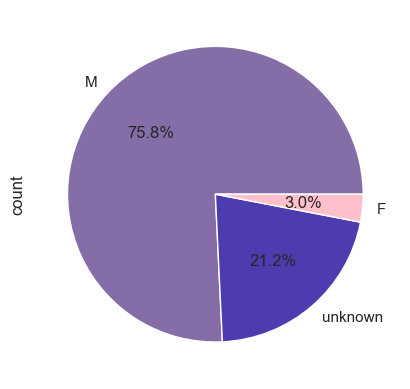

In [616]:
filter_interact = sharks[sharks["activity"] == "shark interacting"]
interact = filter_interact["sex"].value_counts()
interact.plot.pie(autopct="%.1f%%", colors=["#856EA8", "#4D3CAF", "pink"])
plt.savefig(f"../images/sh_int_sex.jpg", dpi=300)

'''At least 75% of the shark interactinc¡g attacks are by men. Let's see how many of them are provoked.'''

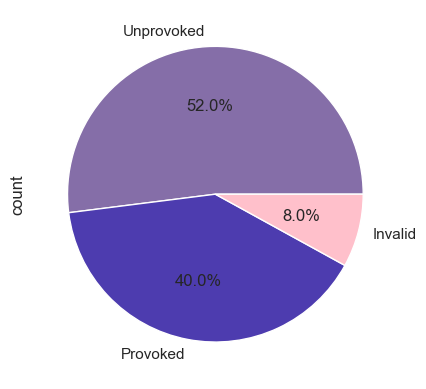

In [617]:
interact_sex = filter_interact[filter_interact["sex"]== "M"]
interact_type = interact_sex["type"].value_counts()
interact_type.plot.pie(autopct="%.1f%%", colors=["#856EA8", "#4D3CAF", "pink"])
plt.savefig(f"../images/type_sex", dpi=300)

    ''' Seing that a great number of attacks are provoked, and all the other data we analized. We can definitely say that sharks are not getting tired, they're just getting angrier as we humans change our lifestyle, and become more annoying, by getting stupider, mostly men.'''